<a href="https://colab.research.google.com/github/Akankshs-Hend/Learning-at-YBI-Foundation/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Customer Churn Model**

---





Objective
1. Data encoading
2.feature scaling 
3.Handaling imbalance data
 A]Random under sampaling
 b]Random over sampling
4.Support vector machine classifier
5.Grid search for hyper parameter tunning 

Datasource: https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv

**Import Library**

In [ ]:
import pandas as pd


In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

**Import Dataset**

In [ ]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

**Describe Data**

In [ ]:
df.head()

In [ ]:
df.info()

**Encoding**

In [ ]:
df['Geography'].value_counts()

In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [ ]:
df['Gender'].value_counts()

In [ ]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [ ]:
df['Num Of Products'].value_counts()

In [ ]:
df.replace({'Num Of Products':{1:0,2:1,3:1, 4:1}},inplace=True)

In [ ]:
df['Has Credit Card'].value_counts()

In [ ]:
df['Is Active Member'].value_counts()

In [ ]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

In [ ]:
df['Zero Balance']=np.where(df['Balance']>0, 1,0)

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn' , 'Geography']).count()

Define Target Variable (y) and Feature Variables (X)s

In [ ]:
df.columns

In [ ]:
X=df.drop(['Surname', 'Churn'], axis=1)

In [ ]:
Y=df['Churn']

In [ ]:
X.shape, Y.shape

((10000, 11), (10000,))

**Random Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus=RandomUnderSampler(random_state=2529)

In [ ]:
X_rus,Y_rus = rus.fit_resample(X,Y)

In [ ]:
X_rus.shape,Y_rus.shape, X.shape, Y.shape

In [ ]:
Y.value_counts()

In [ ]:
Y_rus.value_counts()

In [ ]:
Y_rus.plot(kind='hist')

**Random Over Sampling**

In [ ]:
 from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=2529)

In [ ]:
X_ros, Y_ros = ros.fit_resample(X,Y)

In [ ]:
X_ros.shape,Y_ros.shape, X.shape, Y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
Y.value_counts()

In [ ]:
Y_ros.value_counts()

<Axes: ylabel='Frequency'>

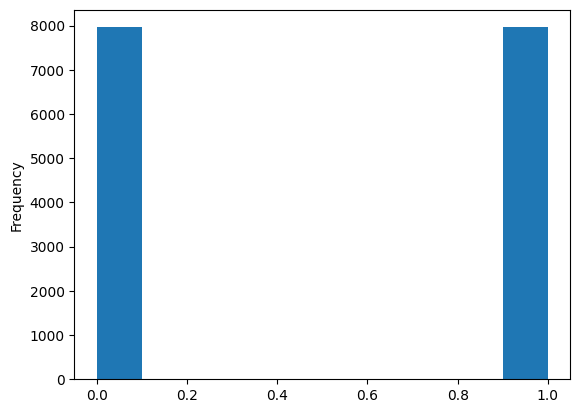

In [59]:
Y_ros.plot(kind='hist')

**Train Test Split** 

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2529)

Support Vector maschine Classifier 

In [70]:
from sklearn.svm import SVC

In [71]:
svc= SVC()

In [ ]:
svc.fit(X_train, Y_train)

In [74]:
Y_pred= svc.predict(X_test)

**Model Accuracy**

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
confusion_matrix(Y_test, Y_pred)

array([[2414,    0],
       [ 586,    0]])

In [ ]:
print (classification_report(Y_test, Y_pred))